In [4]:
# import packages needed for data handling 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

# import packages to split the data 
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# import models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import SVC
import xgboost as xgb

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [6]:
# read in modeling data file
cols = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40',
       'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50',
       'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60',
       'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70',
       'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'Y1', 'Y2','Y']

df = pd.read_csv('data/modeling.csv', header=0, names=cols)
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f71,f72,f73,f74,f75,f76,f77,Y1,Y2,Y
0,-0.01821,-0.010433,-0.018399,-0.018279,-2.896385,-0.024231,-0.02066,4.079933,-1.414801,-3.011022,...,0,0,0,0,0,0,9.0,0,0,2.0
1,-0.01821,-3.182200,-3.260786,-3.270119,-2.037297,-0.024231,-0.02066,3.366161,-3.683655,-3.011022,...,0,0,0,0,0,0,9.0,0,0,2.0


In [7]:
df = df.drop(['Y1','Y2'], axis=1)
df.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f69,f70,f71,f72,f73,f74,f75,f76,f77,Y
0,-0.01821,-0.010433,-0.018399,-0.018279,-2.896385,-0.024231,-0.02066,4.079933,-1.414801,-3.011022,...,0,0,0,0,0,0,0,0,9.0,2.0
1,-0.01821,-3.182200,-3.260786,-3.270119,-2.037297,-0.024231,-0.02066,3.366161,-3.683655,-3.011022,...,0,0,0,0,0,0,0,0,9.0,2.0


In [8]:
# Splitting up our data into features and targets

X = df.iloc[:, :-1] # Features
Y = df.Y # Target 1

# Split dataset into training set and test set using a 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

# import the RandomOverSampler package from imblearn
# this package will help address the imbalanced nature of the targets 
from imblearn.over_sampling import RandomOverSampler

# define the RandomOverSampler (ros) model
ros = RandomOverSampler(random_state=2019)

# fit the training data only to the RandomOverSampler model
X_train_resample, Y_train_resample = ros.fit_resample(X_train, Y_train)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## 1. Decision Tree

In [9]:
# build decision tree 
dt = DecisionTreeClassifier(random_state=2019)

# Train Decision Tree Classifer
dt = dt.fit(X_train_resample,Y_train_resample)

# Predict the target for the test data 
Y_pred = dt.predict(X_test)

In [11]:
# Model Accuracy, how often is the Decision Tree correct?
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
#print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7774906442977647
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      8692
         1.0       0.16      0.20      0.17      1532
         2.0       0.90      0.87      0.88      5612

    accuracy                           0.77     15836
   macro avg       0.63      0.62      0.62     15836
weighted avg       0.79      0.77      0.78     15836

[[6994 1314  384]
 [1059  300  173]
 [ 429  289 4894]]


In [13]:
# define the feature importance variable 
feature_imp = pd.Series(dt.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
feature_imp

f13    0.250044
f4     0.126432
f23    0.106214
f3     0.055497
f1     0.038081
f2     0.036351
f0     0.035939
f24    0.032761
f25    0.029601
f77    0.028937
f9     0.018781
f16    0.016147
f12    0.015453
f17    0.014664
f11    0.014455
f8     0.013411
f21    0.012602
f7     0.011090
f10    0.010797
f74    0.010274
f32    0.008652
f19    0.008639
f31    0.007299
f59    0.007095
f34    0.005332
f64    0.005258
f20    0.005040
f45    0.004924
f26    0.004850
f54    0.004816
         ...   
f35    0.001117
f42    0.001006
f53    0.000973
f73    0.000905
f49    0.000859
f40    0.000856
f61    0.000806
f72    0.000641
f46    0.000636
f76    0.000574
f63    0.000518
f68    0.000503
f60    0.000432
f71    0.000400
f66    0.000389
f70    0.000377
f58    0.000367
f41    0.000350
f38    0.000298
f69    0.000281
f27    0.000242
f43    0.000225
f28    0.000213
f52    0.000056
f22    0.000000
f6     0.000000
f5     0.000000
f47    0.000000
f65    0.000000
f67    0.000000
Length: 78, dtype: float

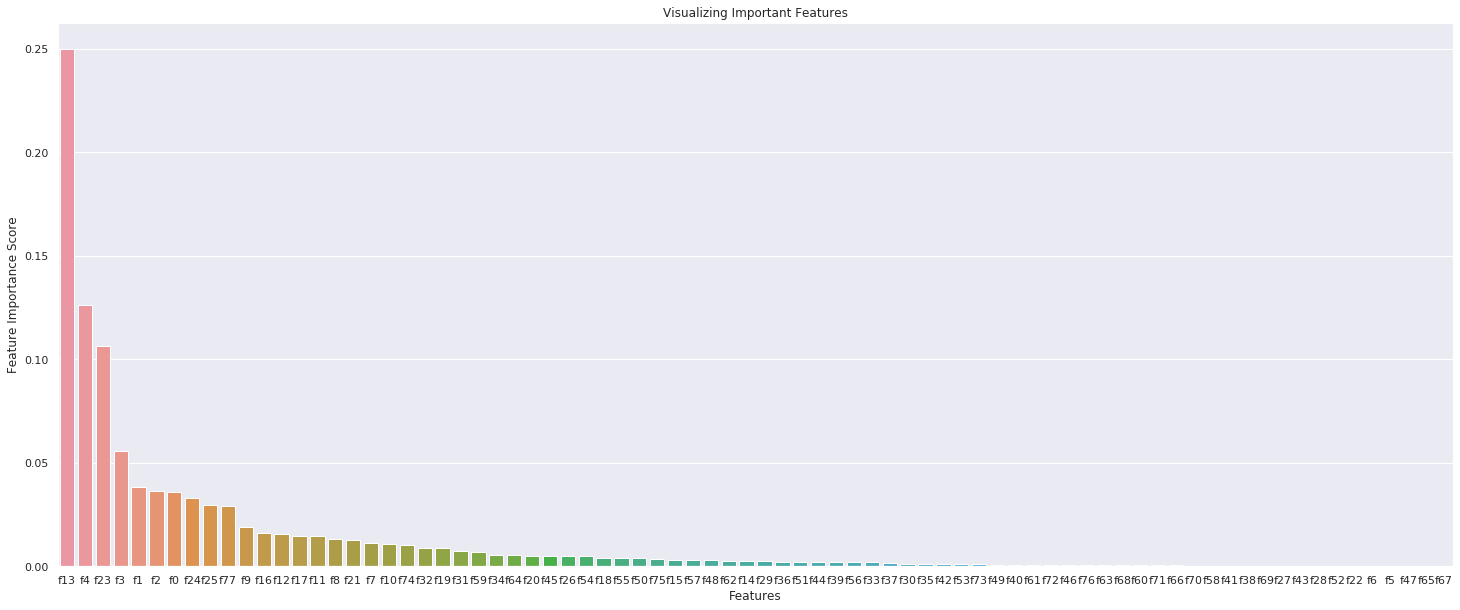

In [14]:
# visualize the feature importance values 
plt.figure(figsize=(25,10))

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title("Visualizing Important Features")

plt.show()

## 2. SVM

In [15]:
# define the svm model 
svc = SVC(kernel='rbf', gamma='auto', random_state=2019)

# fit svm model 
svc = svc.fit(X_train_resample, Y_train_resample)

# predict the target using the testing data 
Y_pred = svc.predict(X_test)

In [16]:
# Model Accuracy, how often is the Decision Tree correct?
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
#print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7650866959379795
              precision    recall  f1-score   support

         0.0       0.86      0.67      0.75      8692
         1.0       0.20      0.48      0.29      1532
         2.0       0.92      0.90      0.91      5612

    accuracy                           0.73     15836
   macro avg       0.66      0.68      0.65     15836
weighted avg       0.82      0.73      0.77     15836

[[5802 2636  254]
 [ 625  740  167]
 [ 281  257 5074]]


## 3. XGBoost

In [17]:
# build xgboost model
xg = xgb.XGBClassifier(n_estimators=100, random_state=2019)

# fit the training data to the model
xg = xg.fit(X_train_resample,Y_train_resample) 

# run the model using test data 
Y_pred=xg.predict(X_test)

In [18]:
# evluate xgboost
print("F1 Score:",metrics.f1_score(Y_test, Y_pred, average='weighted'))
#print("AUC Score:",metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

F1 Score: 0.7613905577607921
              precision    recall  f1-score   support

         0.0       0.87      0.66      0.75      8692
         1.0       0.20      0.47      0.28      1532
         2.0       0.91      0.92      0.91      5612

    accuracy                           0.73     15836
   macro avg       0.66      0.68      0.65     15836
weighted avg       0.82      0.73      0.76     15836

[[5695 2659  338]
 [ 628  714  190]
 [ 226  210 5176]]


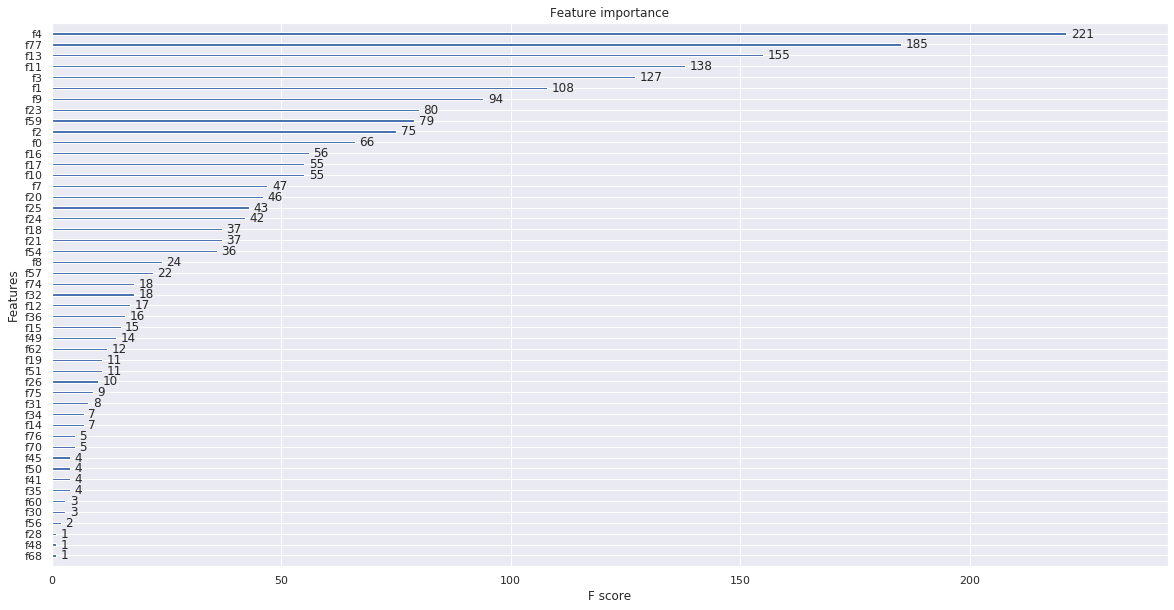

In [20]:
# visualize the feature importances according to the xgboost model
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()